# AWeSoMe Lab Intro and Setup Assignment Notebook

This is the Jupyter notebook for the HMC AWeSoMe Lab Intro and Setup Assignment "Hello, Convokit" ([writeup here](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?usp=sharing)). Solutions to coding questions _and_ written questions should be put here (you can use markdown cells for the written questions).

## Part 1: Load a Corpus!

See the [writeup for Part 1](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.yhpnne8a6ns3) before continuing.

In [4]:
from convokit import Corpus, download

In [33]:
reddit_corpus = Corpus(filename=download("reddit-corpus-small"))

Dataset already exists at /home/ssegal/.convokit/saved-corpora/reddit-corpus-small


In [3]:
reddit_corpus.print_summary_stats()

Number of Speakers: 119889
Number of Utterances: 297132
Number of Conversations: 8286


## Part 2: Re-implement print_summary_stats

See the [writeup for Part 2](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.jz5jp4t11fwd) before continuing.

In [4]:
# Here's how you would iterate over Speakers:
n_speakers = 0
for speaker in reddit_corpus.iter_speakers():
    n_speakers += 1
print(n_speakers)

119889


TASK: In the two code cells below, modify the provided code to count Utterances and Speakers.

In [5]:
n_utterances = 0
for utterance in reddit_corpus.iter_utterances():
    n_utterances += 1
print(n_utterances)

297132


In [6]:
n_conversations = 0
for conversation in reddit_corpus.iter_conversations():
    n_conversations += 1
print(n_conversations)

8286


## Part 3: Working with metadata

See the [writeup for Part 3](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.ciwzim5uquvi) before continuing.

In [8]:
# Here's an example of accessing Conversation metadata
# (demonstrated on a randomly selected Conversation)
c = reddit_corpus.random_conversation()
print(c.meta["title"])

I've Witnessed Him 'Stumbling Drunk': Brett Kavanaugh's Classmate Says Supreme Court Nominee is 'Blatantly Lying'


TASK: Using conversation-level metadata and the iterators you practiced in Part 2, compute (a) the total number of subreddits in the Corpus, and (b) the 5 subreddits with the most conversations (along with the exact number of conversations in each of those 5 subreddits).

In [40]:
subreddits = {};
for c in reddit_corpus.iter_conversations():
    if c.meta["subreddit"] in subreddits:
        subreddits.update({c.meta["subreddit"]: subreddits[c.meta["subreddit"]]+1})
    else:
        subreddits[c.meta["subreddit"]] = 1

sortedSubreddits = sorted(subreddits, key = subreddits.get)

top5 = sortedSubreddits[-1:-6:-1]
for s in top5:
    print(s + ", " + str(subreddits[s]))
#print(sorted(subreddits, key = subreddits.get))
print("Number of subreddits: " + str(len(subreddits)))


funny, 100
teenagers, 99
techsupport, 98
pokemontrades, 98
hockey, 98
Number of subreddits: 100


## Part 4: Transformers, roll out!

See the [writeup for Part 4](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.lhawg1ufgxev) before continuing.

In [42]:
# Here's an example of applying a simple Transformation
# (the TextCleaner, which does basic text standardization such as lowercasing everything)
from convokit import TextCleaner
cleaner = TextCleaner(replace_text=False)
reddit_corpus = cleaner.transform(reddit_corpus)
utt = reddit_corpus.random_utterance()
print("Original text:", utt.text)
print("Cleaned text:", utt.meta["cleaned"])

100/297132 utterances processed
200/297132 utterances processed
300/297132 utterances processed
400/297132 utterances processed
500/297132 utterances processed
600/297132 utterances processed
700/297132 utterances processed
800/297132 utterances processed
900/297132 utterances processed
1000/297132 utterances processed
1100/297132 utterances processed
1200/297132 utterances processed
1300/297132 utterances processed
1400/297132 utterances processed
1500/297132 utterances processed
1600/297132 utterances processed
1700/297132 utterances processed
1800/297132 utterances processed
1900/297132 utterances processed
2000/297132 utterances processed
2100/297132 utterances processed
2200/297132 utterances processed
2300/297132 utterances processed
2400/297132 utterances processed
2500/297132 utterances processed
2600/297132 utterances processed
2700/297132 utterances processed
2800/297132 utterances processed
2900/297132 utterances processed
3000/297132 utterances processed
3100/297132 utteran

TASK: Use the [Fighting Words Transformer](https://convokit.cornell.edu/documentation/fightingwords.html) to generate a plot comparing the usage of words in the subreddits "nfl" and "programming".

Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 2533 valid corpus components. class2_func returned 3233 valid corpus components.
Vocab size is 1976
Comparing language...
ngram zscores computed.


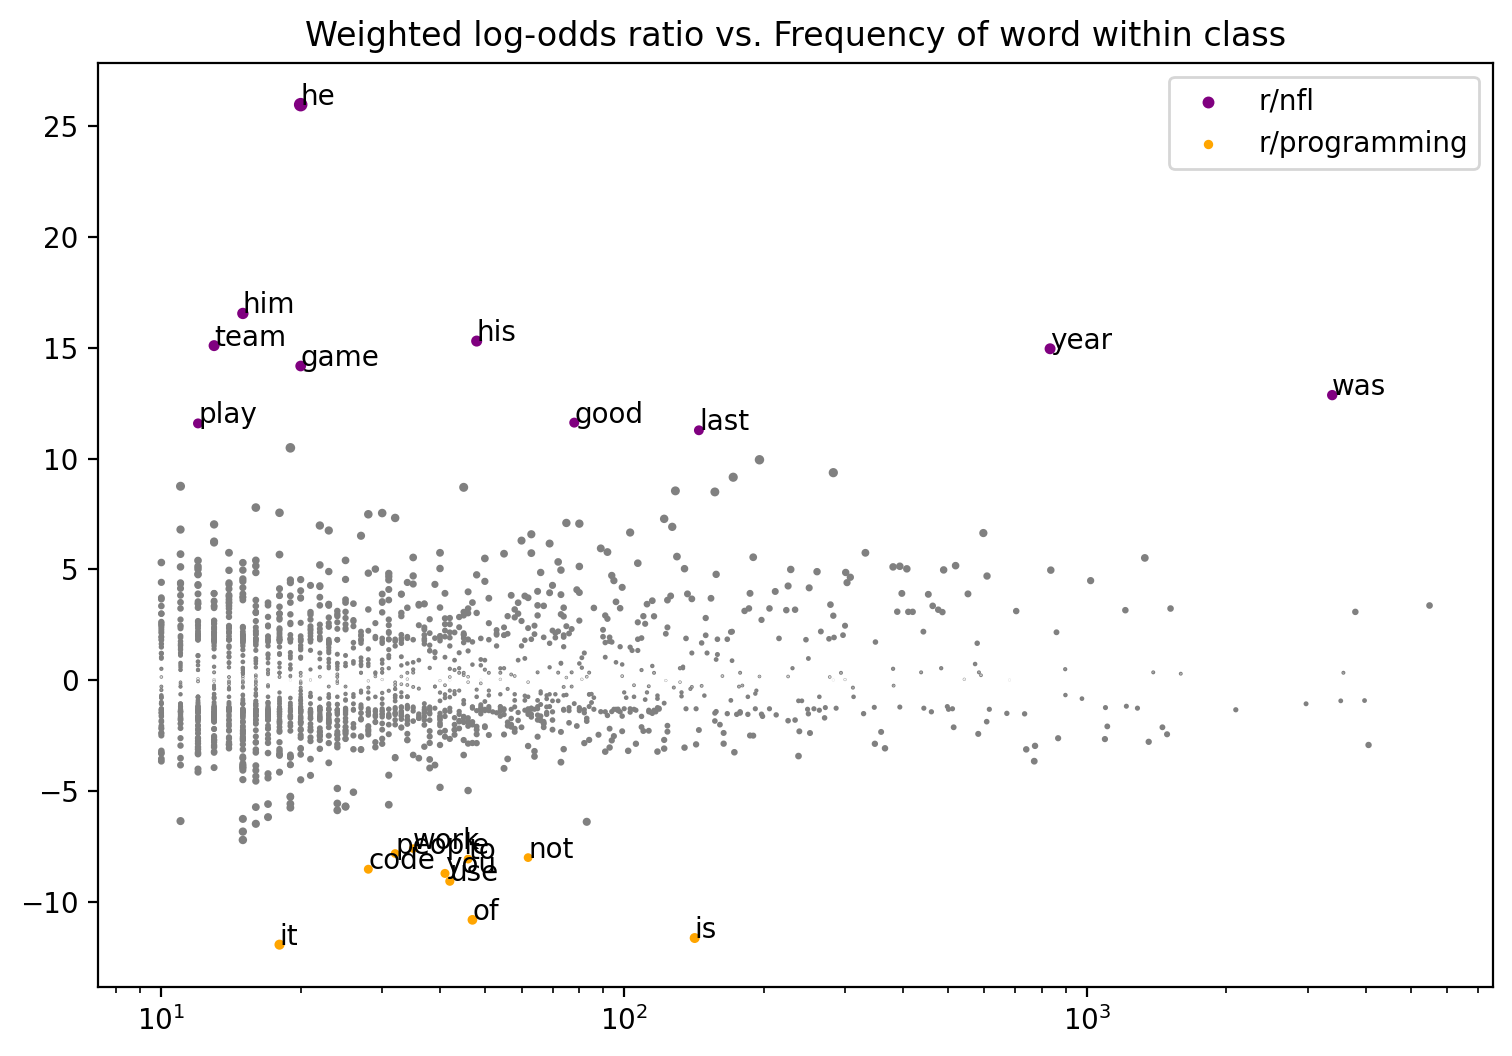

,z-score,class
ngram,,
it,-11.942379,r/programming
is,-11.643340,r/programming
of,-10.821973,r/programming
use,-9.079404,r/programming
you,-8.726617,r/programming
...,...,...
year,14.955275,r/nfl
team,15.096837,r/nfl
his,15.302508,r/nfl


In [16]:
from convokit import Corpus, download, FightingWords
fw = FightingWords(ngram_range=(1,1))
fw.fit(reddit_corpus, class1_func = lambda utt: utt.meta['subreddit'] == "nfl", class2_func = lambda utt:utt.meta['subreddit'] == "programming",)
df = fw.summarize(reddit_corpus, plot=True, class1_name='r/nfl', class2_name='r/programming')

df

## Part 5: Your turn!

See the [writeup for Part 5](https://docs.google.com/document/d/1sMnhaWcx5VgZDhnTW4xSj0FmjITdqFqoMXMWCEoHyoE/edit?tab=t.0#heading=h.ep64m0asidvd) before continuing.

Before you write any code, please write down in this text cell what groups you have chosen to compare, and what hypotheses you came up with beforehand.

We are going to compare r/politics utterances with positive and negative post scores. We predict that the unigrams strongly associated with negative scores are associated with incivility and disagreement. In particular, we expect words associated with negative scores will show the cues of incivility discussed in "Thread With Caution" such as profanity, use of "you," etc.

Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 368 valid corpus components. class2_func returned 4020 valid corpus components.
Vocab size is 1496
Comparing language...
ngram zscores computed.


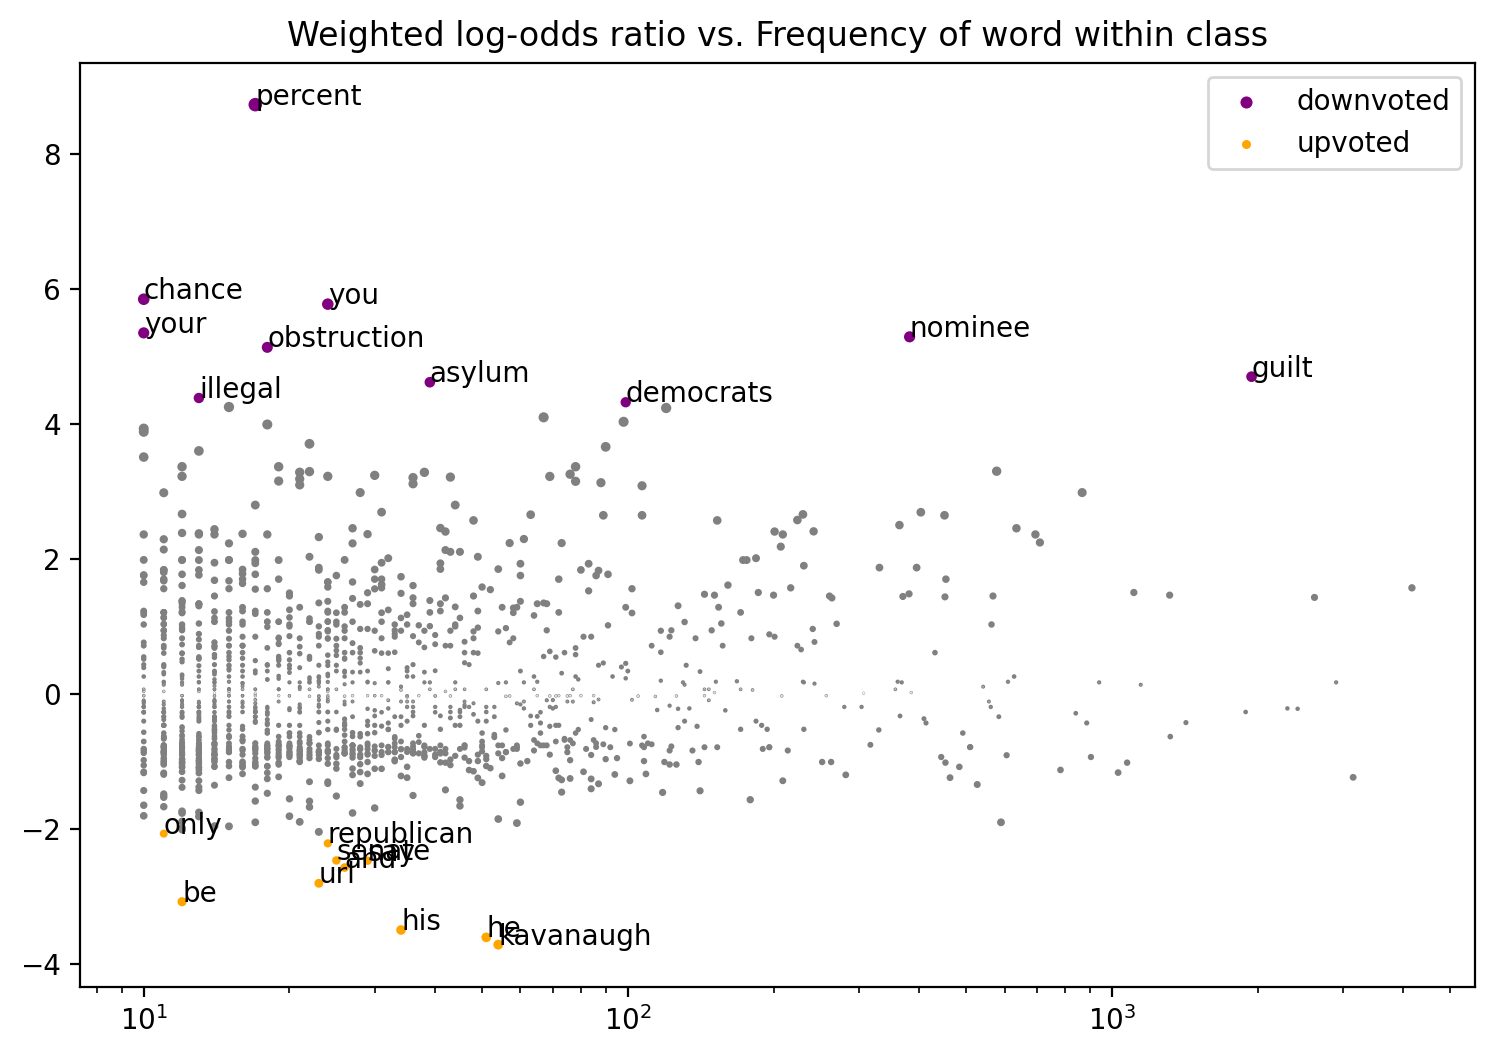

             z-score    class
ngram                        
kavanaugh  -3.717629  upvoted
he         -3.609752  upvoted
his        -3.500177  upvoted
be         -3.081209  upvoted
url        -2.807572  upvoted
and        -2.574800  upvoted
say        -2.473168  upvoted
senate     -2.469154  upvoted
republican -2.215712  upvoted
only       -2.071942  upvoted
state      -2.045780  upvoted
was        -2.010269  upvoted
probably   -1.991490  upvoted
in         -1.963365  upvoted
american   -1.960768  upvoted
judge      -1.915226  upvoted
means      -1.903630  upvoted
understand -1.903630  upvoted
anyone     -1.897183  upvoted
actually   -1.891156  upvoted
us         -1.855332  upvoted
gop        -1.817996  upvoted
ll         -1.813196  upvoted
life       -1.807327  upvoted
always     -1.766970  upvoted
term       -1.765519  upvoted
new        -1.755923  upvoted
will       -1.739424  upvoted
committee  -1.691529  upvoted
out        -1.677516  upvoted
supply     -1.672196  upvoted
else      

In [58]:
import pandas as pd

fw = FightingWords(ngram_range=(1,1))
fw.fit(reddit_corpus, class1_func = lambda utt: utt.meta['subreddit'] == "politics" and utt.meta['score']<0, class2_func = lambda utt:utt.meta['subreddit'] == "politics" and utt.meta['score']>0,)
df = fw.summarize(reddit_corpus, plot=True, class1_name='downvoted', class2_name='upvoted')

print(df.head(50))
print(df.tail(50))


Now write down in this text cell some things that you found. How did the results compare to your expectations? Was there anything that surprised you? Is there anything you would do differently?



Our hypothesis seems correct. "You" and "your" were strongly associated with downvotes, as was "bullshit" (an example of profanity which is associated with toxicity). Furthermore, "he", "his," and "us" were strongly associated with upvotes. 

Furthermore, several words associated with Republicans ("Republican," "GOP", "Kavanaugh") were associated with upvotes, and words associated with Democrats ("Clinton", "Sanders", "Democrats," "liberals") were associated with downvotes. Since r/politics leans very liberal, one possible explanation is that people of one party are more likely to discuss the other group with formal/group language (consider connotation of just "Sanders" vs. just "Bernie," which is warmer and less formal). This means that e.g. usage of "GOP" might arise more from Democrats and receive more upvotes as a result (since most people on the subreddit are Democrats), and usage of "liberals" might arise more from conservatives and receive more downvotes as as a result (since fewer people on the subreddit are conservative).

Just for fun we'll also look at r/Libertarian (but not draw any conclusions from it):

Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 293 valid corpus components. class2_func returned 2500 valid corpus components.
Vocab size is 1425
Comparing language...
ngram zscores computed.


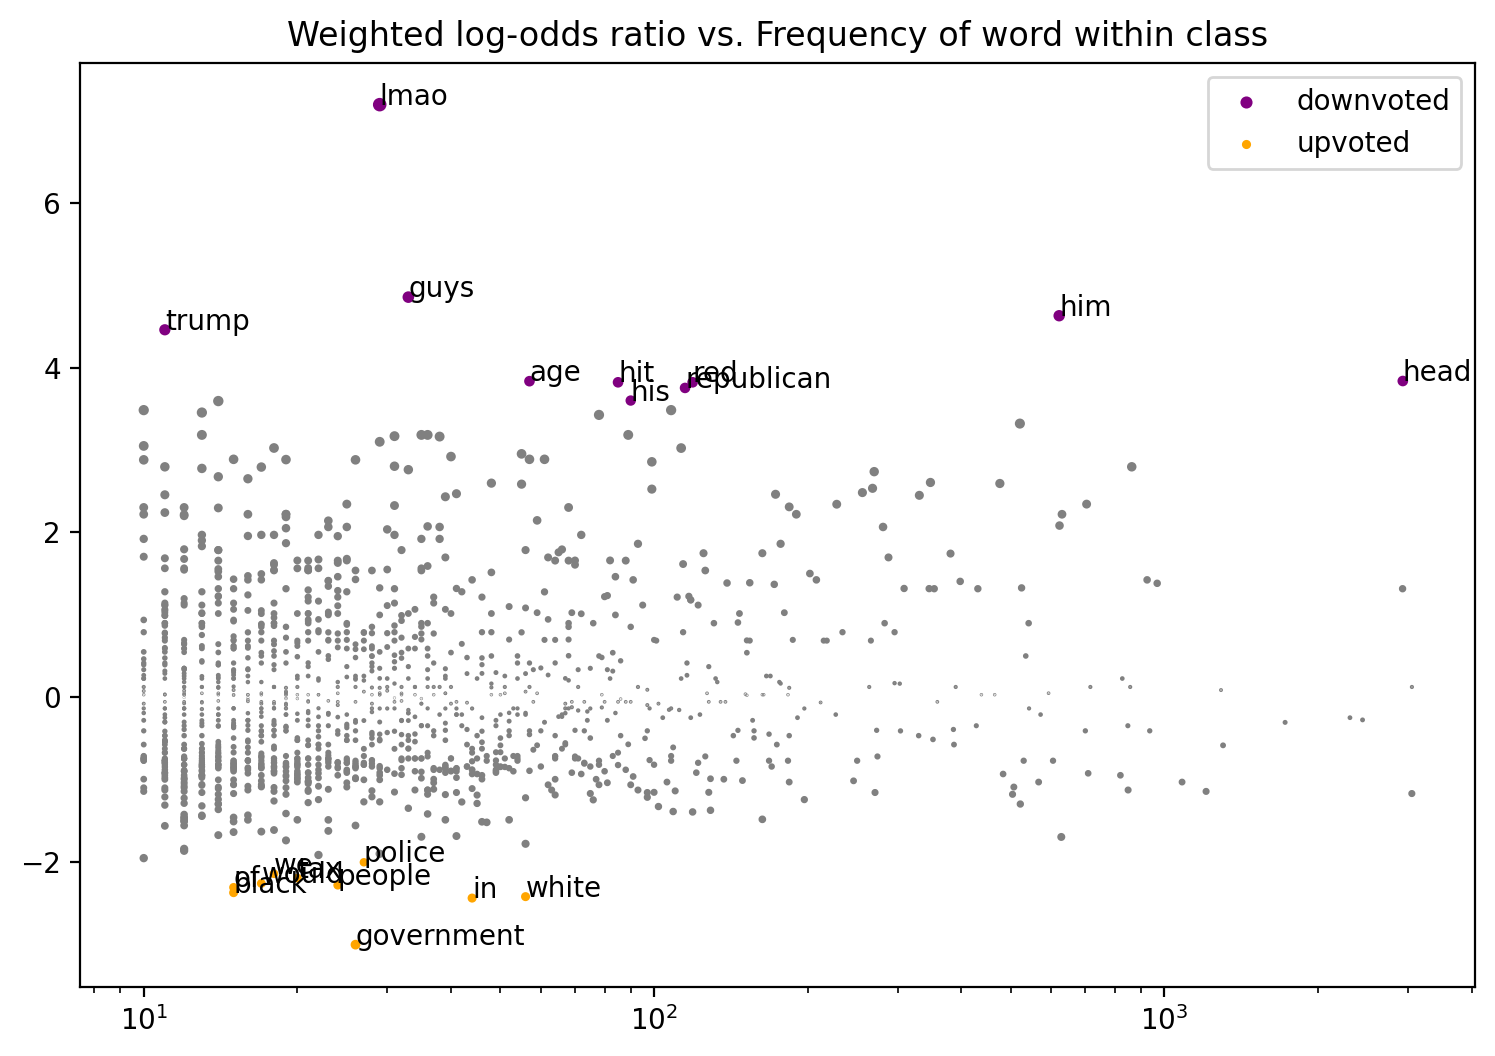

,z-score,class
ngram,,
government,-3.007956,upvoted
in,-2.442003,upvoted
white,-2.424586,upvoted
black,-2.376461,upvoted
of,-2.312480,upvoted
...,...,...
head,3.839931,downvoted
trump,4.462328,downvoted
him,4.633053,downvoted


In [32]:
fw = FightingWords(ngram_range=(1,1))
fw.fit(reddit_corpus, class1_func = lambda utt: utt.meta['subreddit'] == "Libertarian" and utt.meta['score']<0, class2_func = lambda utt:utt.meta['subreddit'] == "Libertarian" and utt.meta['score']>0,)
df = fw.summarize(reddit_corpus, plot=True, class1_name='downvoted', class2_name='upvoted')

df

**Day 2:**

Initializing default CountVectorizer with ngram_range (1, 1)... Done.
class1_func returned 368 valid corpus components. class2_func returned 4020 valid corpus components.
Vocab size is 20
Comparing language...
ngram zscores computed.


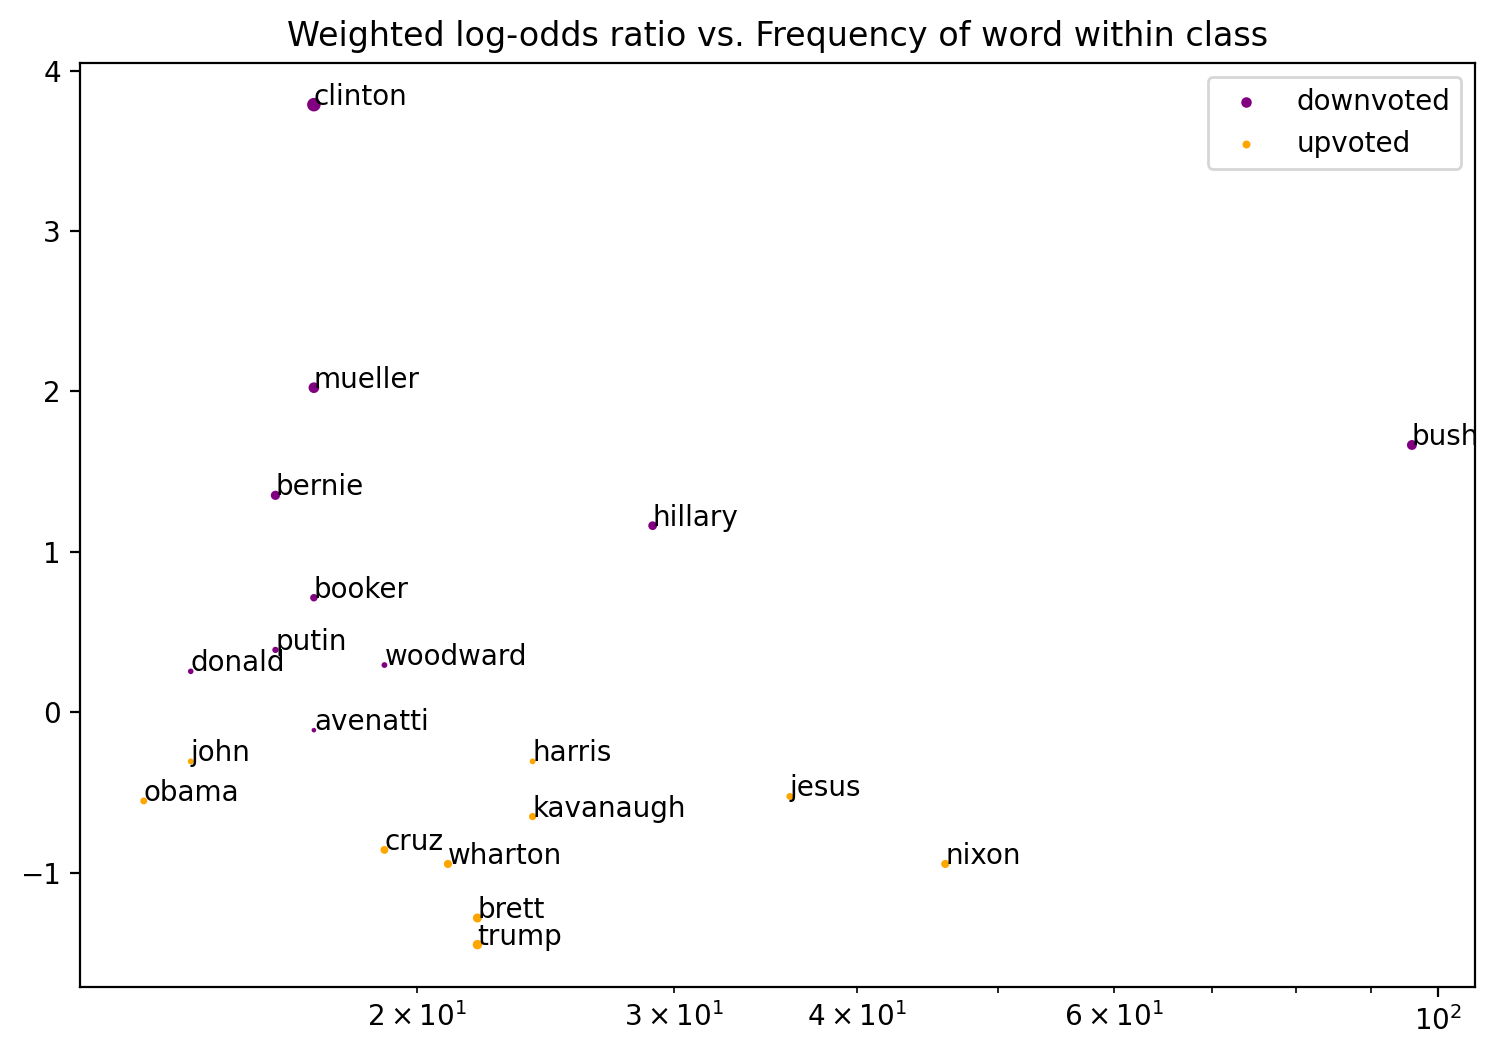

            z-score      class
ngram                         
trump     -1.447766    upvoted
brett     -1.281596    upvoted
wharton   -0.944790    upvoted
nixon     -0.944790    upvoted
cruz      -0.857124    upvoted
kavanaugh -0.649494    upvoted
obama     -0.552168    upvoted
jesus     -0.523713    upvoted
john      -0.305284    upvoted
harris    -0.305284    upvoted
avenatti  -0.110816    upvoted
donald     0.255750  downvoted
woodward   0.294872  downvoted
putin      0.389330  downvoted
booker     0.714502  downvoted
hillary    1.163398  downvoted
bernie     1.352730  downvoted
bush       1.666356  downvoted
mueller    2.023494  downvoted
clinton    3.787544  downvoted
            z-score      class
ngram                         
trump     -1.447766    upvoted
brett     -1.281596    upvoted
wharton   -0.944790    upvoted
nixon     -0.944790    upvoted
cruz      -0.857124    upvoted
kavanaugh -0.649494    upvoted
obama     -0.552168    upvoted
jesus     -0.523713    upvoted
john    

In [30]:
import spacy
nlp = spacy.load("en_core_web_sm")

def filter(utterance):
    doc = nlp(utterance.text)
    filtered_tokens = [token.text for token in doc if (not token.is_stop or token.pos_ == "PRON")]
    cleaned_utterance = ""
    for token in filtered_tokens:
        cleaned_utterance = cleaned_utterance + " " + token
    utterance.text = cleaned_utterance

for utterance in reddit_corpus.iter_utterances():
    if utterance.meta["subreddit"] == "politics":
        filter(utterance)

fw = FightingWords(ngram_range=(1,1))
fw.fit(reddit_corpus, class1_func = lambda utt: utt.meta['subreddit'] == "politics" and utt.meta['score']<0, class2_func = lambda utt:utt.meta['subreddit'] == "politics" and utt.meta['score']>0,)
df = fw.summarize(reddit_corpus, plot=True, class1_name='downvoted', class2_name='upvoted')

print(df.head(50))
print(df.tail(50))




                

 gt cartoons](https://www.abebooks.com
 gt Trump GOP
 gt democrats
 gt democrats
 gt gt democrat Knuckle
 gt gt democrat Knuckle
 gt Strange gt gt donnie
 gt Strange gt gt donnie
 gt Strange gt gt donnie
 gt Mr. Magoo
 gt Constitution Congress Trump
 gt Constitution
 gt Nixon
 gt Hmmm
 gt Nixon Man
 gt Nazis f ing Trump
 gt Woodward Bob Woodward Watergate
 gt Jew Annie
 gt Trump Russians
 gt Trump Nixon Putin
 UnexpectedPratchett Related ----- gt define.php?term = mu Terry Pratchett --Terry Pratchett Hogfather](https://www.youtube.com I4oxrTSRkC0 Susan MERE BALL GAS Susan LITERAL MINDED Susan PINK PILL FANTASY HUMAN PLACE ANGEL APE Tooth UNIVERSE FINEST FINEST MOLECULE UNIVERSE JUDGED POINT PLACE Susan STARS EXPLODE WORLD COLLIDE HARDLY UNIVERSE FROZEN FRIED BED Talent SPECIAL KIND UNIVERSE HEADS Susan AREN'T
 gt Republican
 gt Corporatist Dem blah gt gt gt gt voters~~ Bernie
 gt Corporatist Dem blah gt gt gt gt voters~~ Bernie
 gt Corporatist Dem blah gt gt gt gt voters~~ Bernie
 gt C

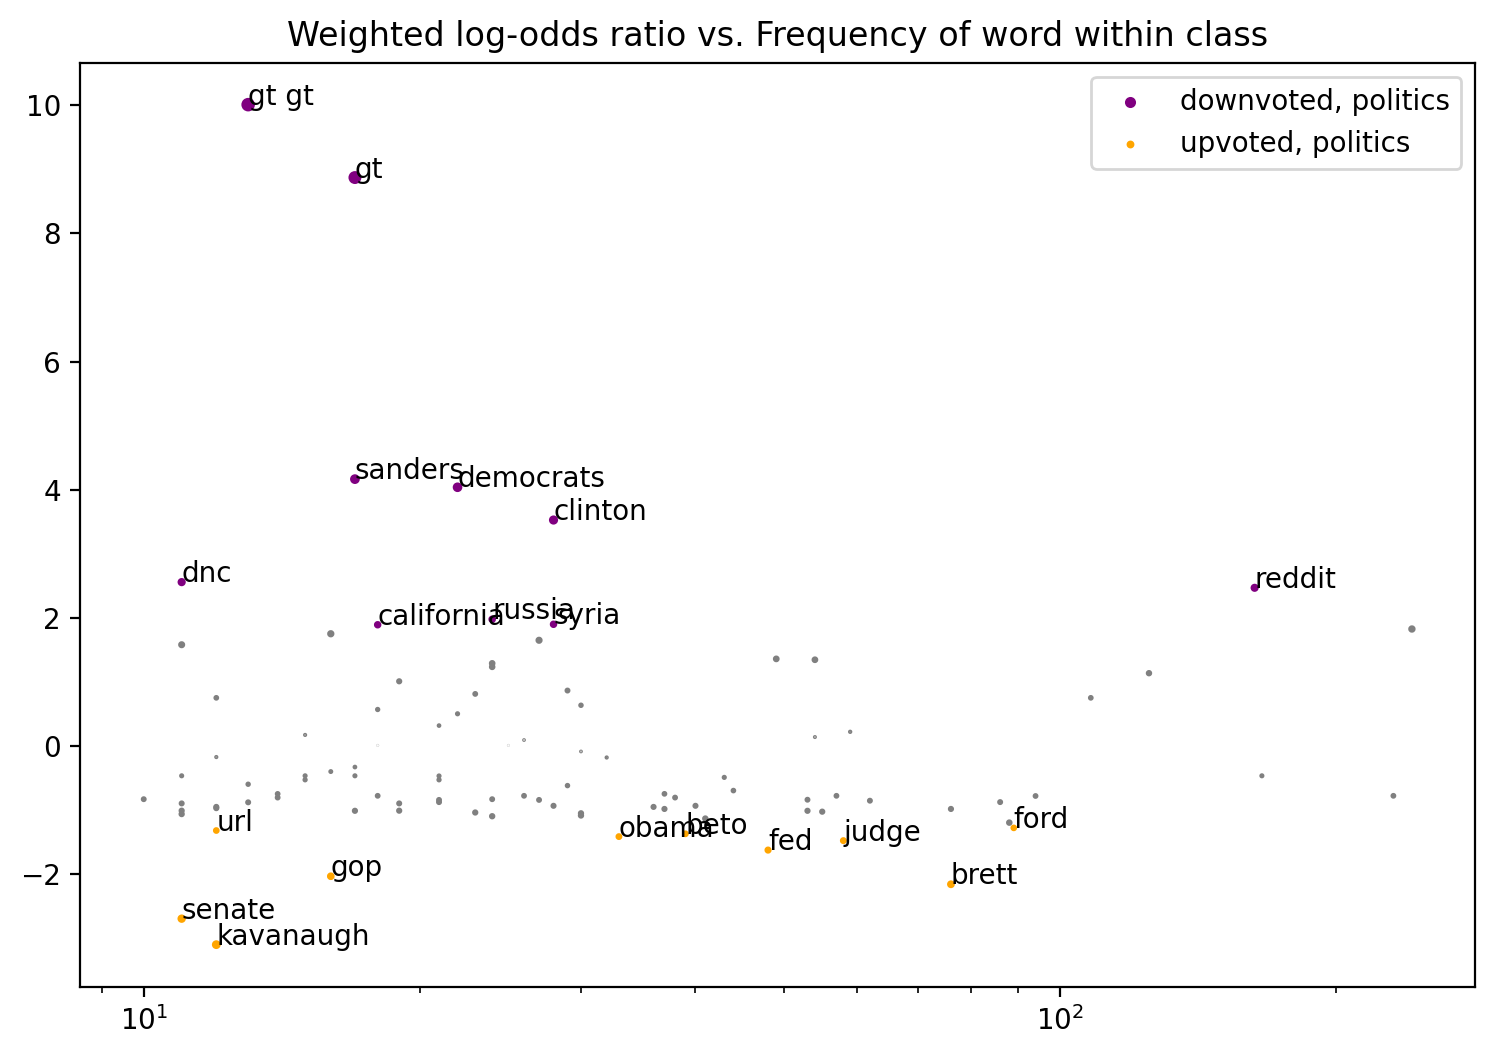

                      z-score              class
ngram                                           
kavanaugh           -3.109949  upvoted, politics
senate              -2.703927  upvoted, politics
brett               -2.166563  upvoted, politics
gop                 -2.041362  upvoted, politics
fed                 -1.632434  upvoted, politics
judge               -1.484772  upvoted, politics
obama               -1.421920  upvoted, politics
beto                -1.378352  upvoted, politics
url                 -1.327011  upvoted, politics
ford                -1.285829  upvoted, politics
brett kavanaugh     -1.203454  upvoted, politics
avenatti            -1.140126  upvoted, politics
new                 -1.103568  upvoted, politics
republican          -1.092265  upvoted, politics
federal             -1.069949  upvoted, politics
november            -1.057915  upvoted, politics
news                -1.045412  upvoted, politics
fox                 -1.032404  upvoted, politics
reserve             

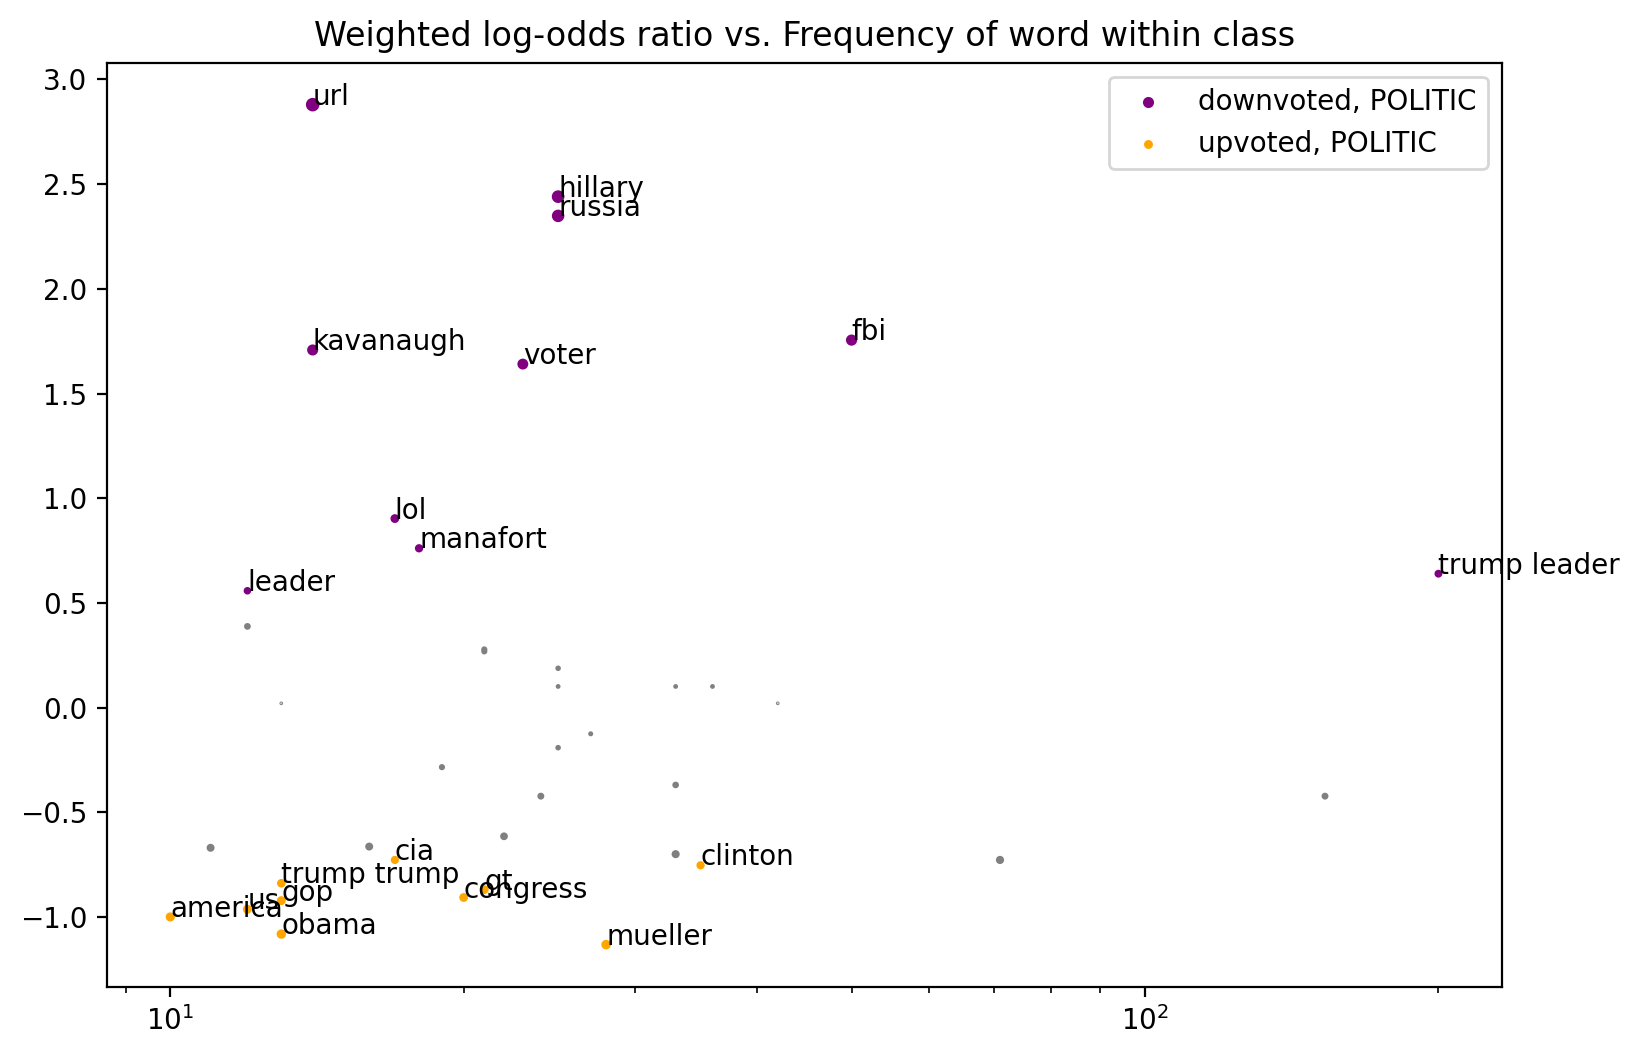

               z-score               class
ngram                                     
mueller      -1.130984    upvoted, POLITIC
obama        -1.080510    upvoted, POLITIC
america      -0.998754    upvoted, POLITIC
us           -0.962072    upvoted, POLITIC
gop          -0.920814    upvoted, POLITIC
congress     -0.905829    upvoted, POLITIC
gt           -0.868395    upvoted, POLITIC
trump trump  -0.837944    upvoted, POLITIC
clinton      -0.752151    upvoted, POLITIC
cia          -0.726633    upvoted, POLITIC
sessions     -0.726633    upvoted, POLITIC
garland      -0.698933    upvoted, POLITIC
bush         -0.668641    upvoted, POLITIC
trump        -0.662710    upvoted, POLITIC
republicans  -0.613719    upvoted, POLITIC
russians     -0.422118    upvoted, POLITIC
senate       -0.422118    upvoted, POLITIC
cohen        -0.368603    upvoted, POLITIC
president    -0.283645    upvoted, POLITIC
dems         -0.190687    upvoted, POLITIC
god          -0.124465    upvoted, POLITIC
voters     

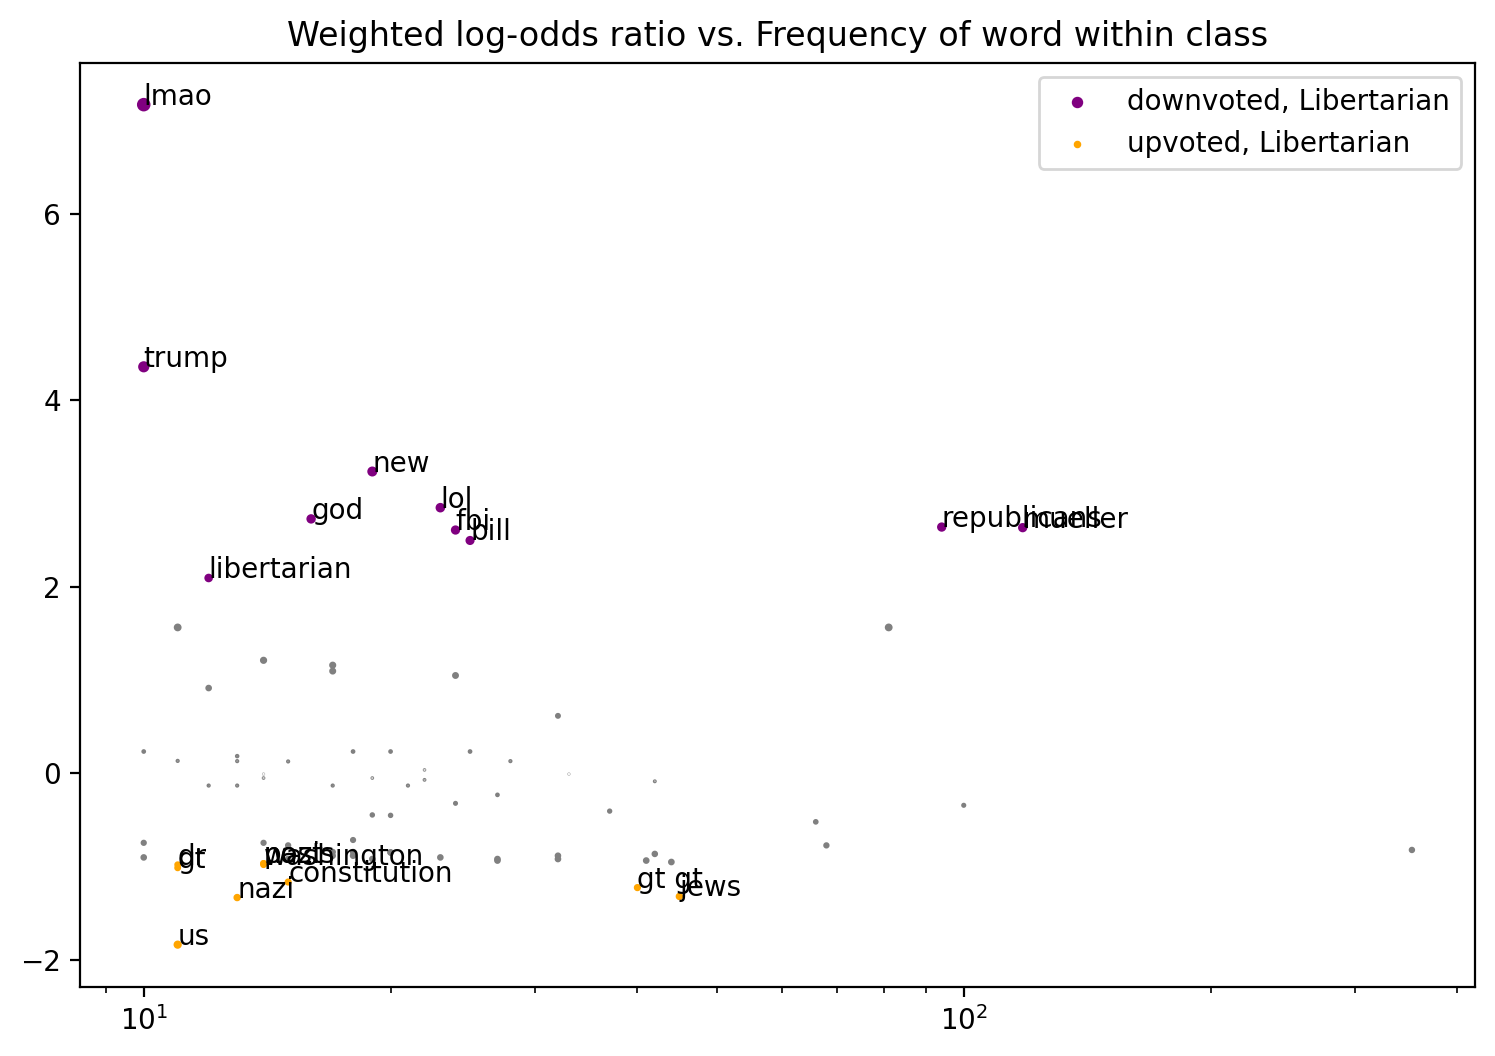

                  z-score                 class
ngram                                          
us              -1.836792  upvoted, Libertarian
nazi            -1.331790  upvoted, Libertarian
jews            -1.319789  upvoted, Libertarian
gt gt           -1.225026  upvoted, Libertarian
constitution    -1.165308  upvoted, Libertarian
gt              -1.013203  upvoted, Libertarian
washington      -0.979695  upvoted, Libertarian
dr              -0.979695  upvoted, Libertarian
post            -0.965486  upvoted, Libertarian
nazis           -0.965486  upvoted, Libertarian
medicare        -0.950626  upvoted, Libertarian
germany         -0.935049  upvoted, Libertarian
jews jews       -0.935049  upvoted, Libertarian
court           -0.918683  upvoted, Libertarian
nfl             -0.918683  upvoted, Libertarian
johnson         -0.918683  upvoted, Libertarian
washington post -0.918683  upvoted, Libertarian
dr ford         -0.901443  upvoted, Libertarian
hillary         -0.901443  upvoted, Libe

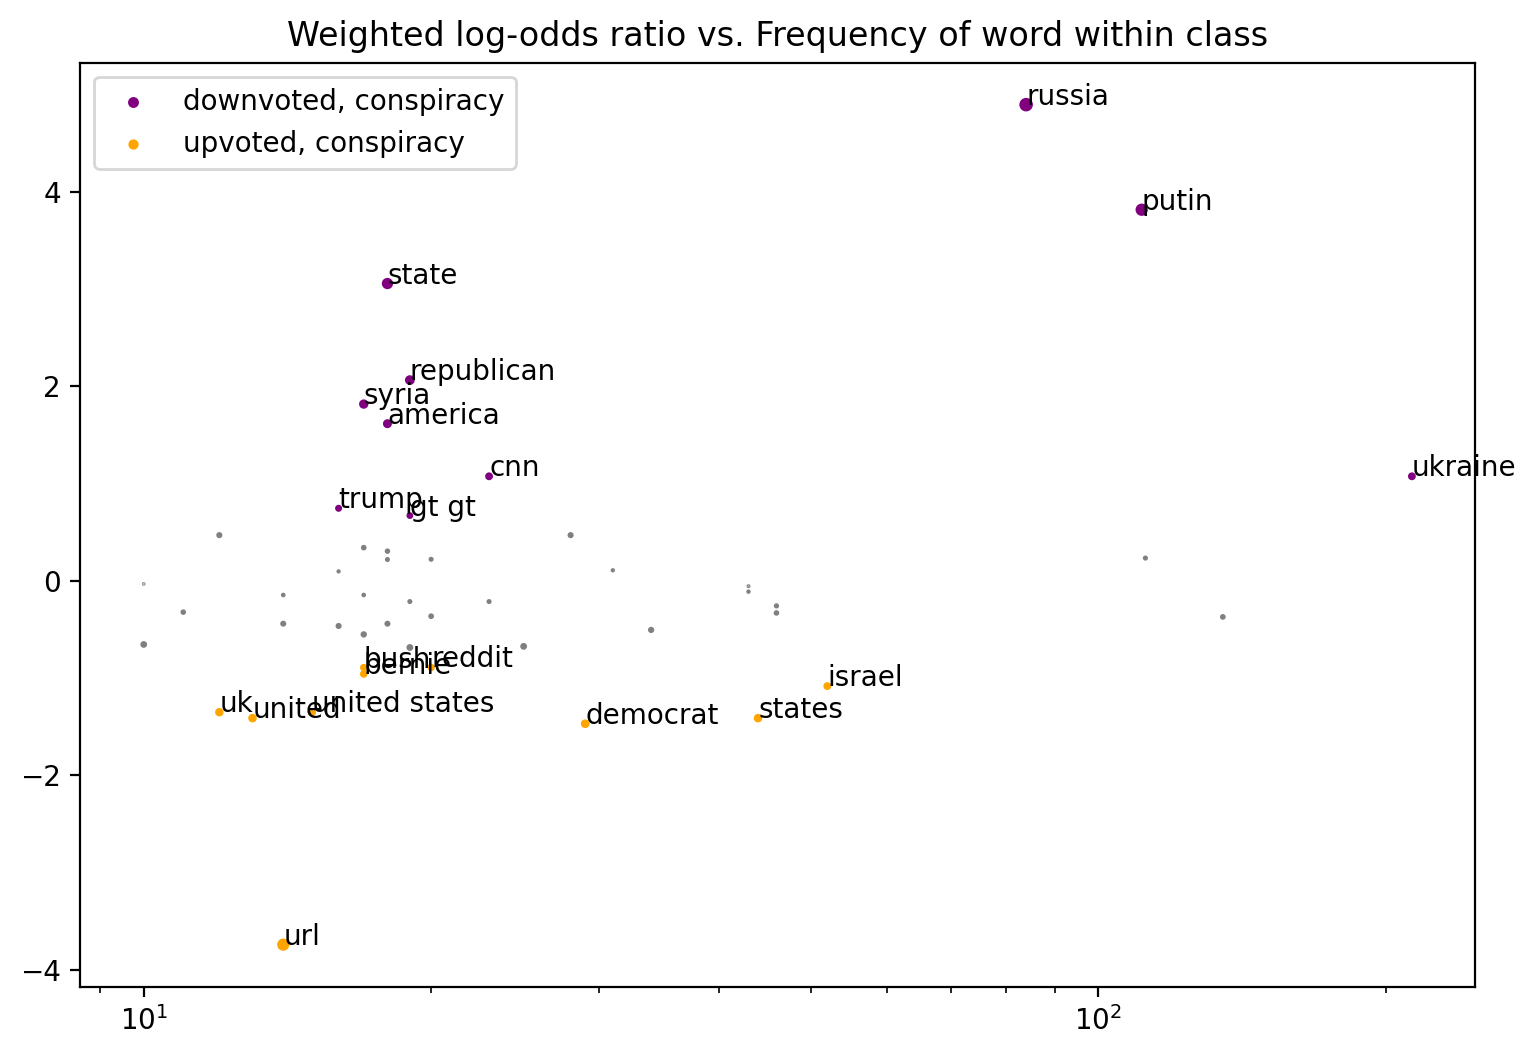

                z-score                  class
ngram                                         
url           -3.741395    upvoted, conspiracy
democrat      -1.470456    upvoted, conspiracy
states        -1.412703    upvoted, conspiracy
united        -1.412703    upvoted, conspiracy
uk            -1.351781    upvoted, conspiracy
united states -1.351781    upvoted, conspiracy
israel        -1.083559    upvoted, conspiracy
bernie        -0.958914    upvoted, conspiracy
bush          -0.893305    upvoted, conspiracy
reddit        -0.891935    upvoted, conspiracy
donald        -0.686254    upvoted, conspiracy
fbi           -0.674825    upvoted, conspiracy
fisa          -0.655254    upvoted, conspiracy
cia           -0.552038    upvoted, conspiracy
mueller       -0.505832    upvoted, conspiracy
republicans   -0.465310    upvoted, conspiracy
google        -0.441664    upvoted, conspiracy
al            -0.441664    upvoted, conspiracy
clinton       -0.372033    upvoted, conspiracy
democrats    

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")


def prop_noun_analysis(subredditTitle): 
    reddit_prop_corpus = reddit_corpus

    def filter_pn(utterance):
        doc = nlp(utterance.text)
        for token in doc:
            if token.text == "gt":
                print(utterance.text)
        filtered_tokens = [token.text for token in doc if (token.pos_ == "PROPN")]
        cleaned_utterance = ""
        for token in filtered_tokens:
            if token == "gt":
                print(utterance.text)
            cleaned_utterance = cleaned_utterance + " " + token
        utterance.text = cleaned_utterance

    for utterance in reddit_prop_corpus.iter_utterances():
        if utterance.meta["subreddit"] == subredditTitle:
            filter_pn(utterance)

    fw = FightingWords(ngram_range=(1,2))
    fw.fit(reddit_prop_corpus, class1_func = lambda utt: utt.meta['subreddit'] == subredditTitle and utt.meta['score']<0, class2_func = lambda utt:utt.meta['subreddit'] == subredditTitle and utt.meta['score']>0,)
    df2 = fw.summarize(reddit_prop_corpus, plot=True, class1_name="downvoted, " + subredditTitle, class2_name="upvoted, " + subredditTitle)

    print(df2.head(50))
    print(df2.tail(50))

prop_noun_analysis("politics")
prop_noun_analysis("POLITIC")
prop_noun_analysis("Libertarian")
prop_noun_analysis("conspiracy")